In [1]:
# importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture
import itertools
from scipy import linalg
from sklearn import mixture
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# reading the dataset
df=pd.read_csv('Clustering_dataset.csv')
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [3]:
# checking the shape
df.shape

(500, 2)

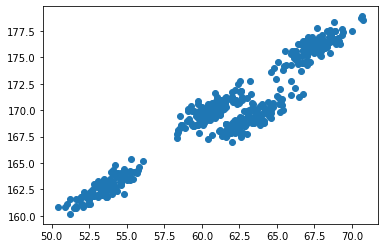

In [4]:
# showing the data on scatter plot
plt.scatter(df['Weight'],df['Height'])

# 1) K Means

<b>1)Choose and report optimal no: of clusters/components for the given dataset and show how you chose the value</b>

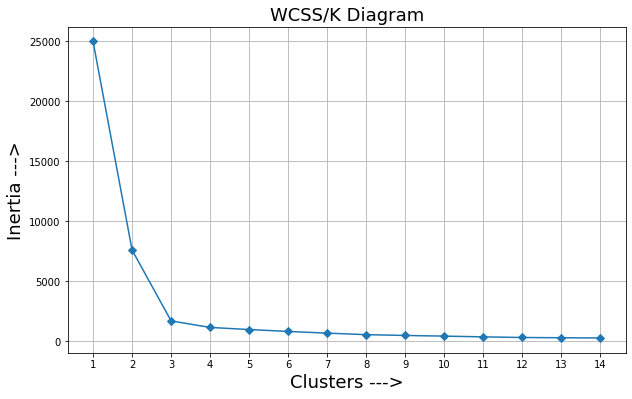

In [5]:
feature=df.iloc[:,[0,1]]
# creating an empty array for storing the values for 'cluster sum within the squares' for different cluster count
wcss=[]

# finding the wcss for different k count and fittinf the data accordingly
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(feature)
    wcss.append(kmeans.inertia_)

# plotting the WCSS/K chart to find the optimum clusters for the dataset
plt.figure(figsize=(10,6))
plt.plot(range(1,15),wcss,'-D')
plt.xlabel('Clusters --->',fontsize=18)
plt.ylabel('Inertia --->',fontsize=18)
plt.xticks(range(1,15))
plt.grid(True)
plt.title('WCSS/K Diagram',fontsize=18)
plt.show()

In [6]:
kl = KneeLocator( range(1, 15), wcss, curve="convex", direction="decreasing")

print("No of Clusters: ",kl.elbow)

No of Clusters:  3


In [7]:
# applying the kmeans algorithm to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=5)

# creating a new column as labels for the data points after fitting the data points according to the model
feature['labels']=kmeans.fit_predict(df)
feature.head()

,Weight,Height,labels
0,67.062924,176.086355,1
1,68.804094,178.388669,1
2,60.930863,170.284496,2
3,59.733843,168.691992,2
4,65.431230,173.763679,1


<b>2)Find best hyperparameters for each clustering technique</b>

In [8]:
from sklearn.model_selection import GridSearchCV
# initializing the parameters
param_grid={
    "init":['k-means++','random'],
    "n_init":[5,10,20,40],
    "max_iter":[100,200,300,400,500],
}

# applying gridsearchCV
grid_cv_kmeans=GridSearchCV(kmeans,param_grid,cv=5)
grid_cv_kmeans.fit(df)

GridSearchCV(cv=5, estimator=KMeans(max_iter=100, n_clusters=3, n_init=5),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_init': [5, 10, 20, 40]})

In [9]:
print("Best Hyperparameters::\n{}".format(grid_cv_kmeans.best_params_))

Best Hyperparameters::
{'init': 'k-means++', 'max_iter': 100, 'n_init': 5}


<b>3) Output the scatter plot for the given data coloring each data point based on clusters assigned (one per clustering method)</b>

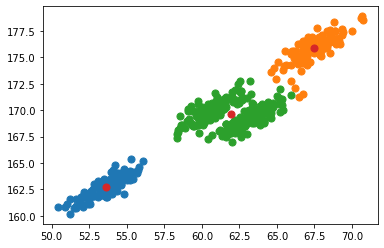

In [10]:
# plotting the scatter plots fir each labels
plt.scatter(feature.Weight[feature.labels==0],feature.Height[feature.labels==0],s=50)
plt.scatter(feature.Weight[feature.labels==1],feature.Height[feature.labels==1],s=50)
plt.scatter(feature.Weight[feature.labels==2],feature.Height[feature.labels==2],s=50)


# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='Centroids',s=50)

# 2) Agglomerative

<b>For agglomearive clustering visualize the dendrogram for the given data</b>

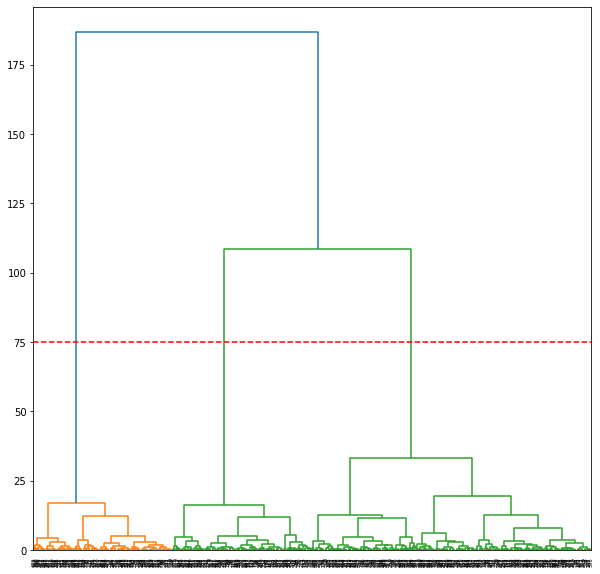

In [11]:
# printing the dendogram diagram
plt.figure(figsize=(10,10))
dendro = dendrogram(linkage(df, method='ward'))
plt.axhline(y=75,color='r',linestyle='--')

<b>1)Choose and report optimal no: of clusters/components for the given dataset and show how you chose the value</b>

By seeing the above dendogram we can say number of clusters will be 3 because
<br>
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 75 and cut the dendrogram. This line cuts the dendogram at three points and hence we have 3 clusters.

In [12]:
# using allomerative technique and fitting the data
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agglo.fit_predict(df)

array([2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2,

<b>2)Find best hyperparameters for each clustering technique</b>

<b>Linkage</b>:<br>
We are going to use the ward linkage as you can see the data on the top right is somewhat merged and to make clusters from that place we need wards method which took minimal increase of sum od squares also called minimum variance method. Proximity between two clusters is the magnitude by which the summed square in their joint cluster will be greaterthant the combined summed square in the two clusters.

<b>3) Output the scatter plot for the given data coloring each data point based on clusters assigned (one per clustering method)</b>

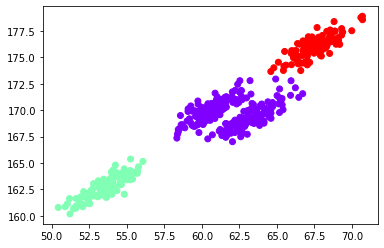

In [13]:
# plotting the scatter plot
plt.scatter(feature['Weight'],feature['Height'],c=agglo.labels_,cmap='rainbow')

# 3) GMM

<b>1)Choose and report optimal no: of clusters/components for the given dataset and show how you chose the value</b>

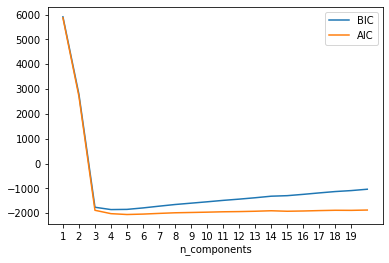

In [14]:
# making an array for checking optimum component value
n_components=np.arange(1,21)

# finding the value for each component
gaussian=[GaussianMixture(n,covariance_type='full',random_state=0).fit(feature) for n in n_components]

# plotting aic and bic to check the component value
plt.plot(n_components, [m.bic(feature) for m in gaussian], label='BIC')
plt.plot(n_components, [m.aic(feature) for m in gaussian], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(range(1,20))
plt.show()

<b>From the above plot we can see the optimal no of components are 3</b>

In [20]:
# using gaussianmixture technique and fitting the data
gmm=GaussianMixture(n_components=3,covariance_type='diag',init_params='random',max_iter=100)
gmm.fit(df)

GaussianMixture(covariance_type='diag', init_params='random', n_components=3)

In [21]:
# predicting the labels
labels=gmm.predict(df)

<b>2)Find best hyperparameters for each clustering technique</b>

In [22]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param_grid={
    "init_params":['k-means','random'],
    "covariance_type":["full", "tied", "diag", "spherical"],
    "max_iter":[100,200,300,400,500],
    
}
# using gridsearchCV method
grid_cv_gmm=GridSearchCV(gmm,param_grid,cv=5)
grid_cv_gmm.fit(df)

c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 193, in fit
    self.fit_predict(X, y)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 238, in fit_predict
    self._initialize_parameters(X, random_state)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 154, in _initialize_parameters
    raise ValueError("Unimplemented ini

c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 193, in fit
    self.fit_predict(X, y)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 238, in fit_predict
    self._initialize_parameters(X, random_state)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 154, in _initialize_parameters
    raise ValueError("Unimplemented ini

c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 193, in fit
    self.fit_predict(X, y)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 238, in fit_predict
    self._initialize_parameters(X, random_state)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 154, in _initialize_parameters
    raise ValueError("Unimplemented ini

c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 193, in fit
    self.fit_predict(X, y)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 238, in fit_predict
    self._initialize_parameters(X, random_state)
  File "c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py", line 154, in _initialize_parameters
    raise ValueError("Unimplemented ini

GridSearchCV(cv=5,
             estimator=GaussianMixture(covariance_type='diag',
                                       init_params='random', n_components=3),
             param_grid={'covariance_type': ['full', 'tied', 'diag',
                                             'spherical'],
                         'init_params': ['k-means', 'random'],
                         'max_iter': [100, 200, 300, 400, 500]})

In [23]:
print("Best Hyperparameters::\n{}".format(grid_cv_gmm.best_params_))

Best Hyperparameters::
{'covariance_type': 'full', 'init_params': 'random', 'max_iter': 500}


<b>3) Output the scatter plot for the given data coloring each data point based on clusters assigned (one per clustering method)</b>

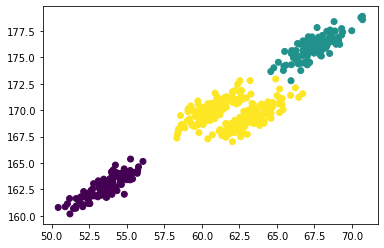

In [24]:
# plotting the scatter plot
plt.scatter(df['Weight'],df['Height'],c=labels,cmap='viridis')

# Observation

All the three techniques are working good for the dataset we are given. Although K means is giving us the some what better results in getting clusters of similar groups together. We can see it through the scatter plot visualization of all the three techniques.